In [31]:
import scipy.integrate as integrate 
import math
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.integrate as integrate 
import cmath 
from scipy import optimize
from scipy.misc import derivative

from decimal import Decimal
from decimal import *
getcontext().prec = 64


In [32]:
 #Defining the (exact) Bosonic and fermionic thermal functions to be used it the effective potential
 #integral allows imaginary masses but only returns the real parts since this is the only thing we are interested in 
 #for the effective potential.    
    
def Jb(m,T):
    
    def integrand(k,m,T):    
        return k**2*np.log(1 - np.exp(-np.sqrt(k**2 + (m/T)**2)))
        
    return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]   

def Jf(m,T):
    
    def integrand(k,m, T):    
        return k**2*np.log(1 + np.exp(-np.sqrt(k**2 + (m/T)**2)))
                                  
    return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]
        


In [60]:
# Parameters and effective masses to be used in the effective potential
# constants of higgs tree level potential
mu = 5000
lam = 0.01
c6 = -1/10000
Lam = 246

#yukawa coupling constant of fermion f 
y_f = 0.99                                          #(for the top quark)

#EW - sector coupling constants g (SU(2)_L) and g_p (U(1)_Y) 
g = 0.65
g_p = 0.36
eps = 0.00001


# Effective mass of fermion f acquired through yukawa coupling w/ the Higgs
def m_f(phi):
    return y_f**2/2*phi**2 + eps

# W and Z boson masses
def m_W(phi):
    return (g**2/4)*phi**2 + eps

def m_Z(phi):
    return (g**2 + g_p**2)*phi**2/4 + eps

# Higgs and Goldstone masses
def m_h(phi):                                               
    return 3*lam*phi**2 - mu**2 - (15/4)*c6*phi**4 + eps

#m_h 0 at h_min = (2/5)*(lam/c6)*(1 - np.sqrt(1-5/3*c6*(mu**2)/lam**2))

def m_g(phi):
    return lam*phi**2 - mu**2 - (3/4)*c6*phi**4 + eps


C:\Users\alana\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
C:\Users\alana\AppData\Local\Temp/ipykernel_8456/2177517383.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return T**4/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]


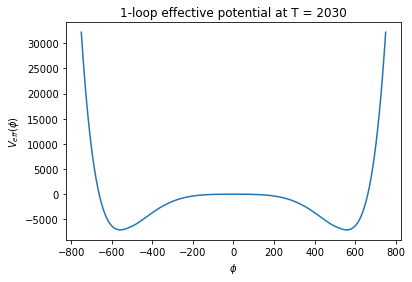

In [61]:
Lam = 246     # regulator/Cutoff(?)

#1-loop effective potential
def v_eff(phi,T):
    return np.real(-(mu**2)/2*phi**2 + (lam/4)*phi**4 - (c6/8)*phi**6
            + m_h(phi)**2/(64*np.pi**2)*(cmath.log(m_h(phi)/Lam) - 3/2) + Jb(cmath.sqrt(m_h(phi)),T)
            + 3*m_g(phi)**2/(64*np.pi**2)*(cmath.log(m_g(phi)/Lam) - 3/2) + 3*Jb(cmath.sqrt(m_g(phi)),T)
            + 3*m_Z(phi)**2/(64*np.pi**2)*(cmath.log(m_Z(phi)/Lam) - 5/6) + 3*Jb(cmath.sqrt(m_Z(phi)),T)
            + 6*m_W(phi)**2/(64*np.pi**2)*(cmath.log(m_W(phi)/Lam) - 5/6) + 6*Jb(cmath.sqrt(m_W(phi)),T)    
            - 12*m_f(phi)**2/(64*np.pi**2)*(cmath.log(m_f(phi)/Lam) - 3/2) - 12*Jf(cmath.sqrt(m_f(phi)),T)
           )/(Lam**4)


vecv_eff = np.vectorize(v_eff)


phi = np.linspace(-750,750,500)
T = 2030
arrv_eff = vecv_eff(phi,T) - v_eff(0,T)


plt.plot(phi, arrv_eff)
plt.xlabel('$\phi$')
plt.ylabel('$V_{eff}(\phi)$')
plt.title('1-loop effective potential at T = %1.0f'  % T)

#Tree level min
phi_min = ((2*lam)/(3*c6))*(1 - np.sqrt(1 - (3*c6*mu**2)/(lam**2)))


In [49]:
#Finding the critical temperature where the effective potential acquires the same value at both minima


# defining a recursive method for finding the critical temperature up to some tolerance which is chosen when calling the 
# function. The function requires a span/interval of temperaturs to as to where it  
#
# The effective potential is normalized so that the first minimum is at v_eff(phi = 0) regadless of T   
# 
#
#
#

def find_t_crit(t_span, tolerance):
    T = np.mean(t_span)
    
    def v_eff_T(phi):
        T = np.mean(t_span)
        return v_eff(phi,T) - v_eff(0,T)
    min2 = v_eff_T(optimize.fmin(v_eff_T, 600)[0])
    
    
    if abs(min2) < tolerance:
        return T
    elif min2 > tolerance:                                      
        return find_t_crit([t_span[0], np.mean(t_span)],tolerance)
    elif min2 < -tolerance:
        return find_t_crit([np.mean(t_span), t_span[1]],tolerance)    
    
    return T


t_span = [1000, 2030]
tolerance = 1

t_c = find_t_crit(t_span, tolerance)   
print(t_c)

Optimization terminated successfully.
         Current function value: -4263.603935
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -1576.081211
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 289.997827
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -692.040126
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -213.701826
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: 34.923126
         Iterations: 21
         Function evaluations: 42
Optimization terminated successfully.
         Current function value: -90.188693
         Iterations: 21
         Function evaluations: 42
Optimization te

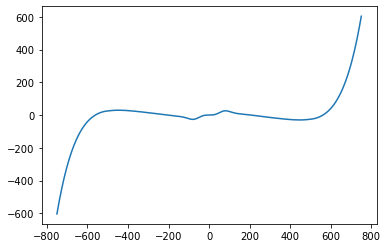

In [52]:
# Finding the bounce action.  
tn = 1500

def v_eff_tn(phi):
    return np.vectorize(v_eff)(phi,tn) - np.vectorize(v_eff)(0,tn)

arrv_eff = vecv_eff(phi,tn) - v_eff(0,tn)

def v_p(phi):
    return derivative(v_eff_tn, phi, dx = 0.00001, order=5)

def f(t,y):    
    A = y[0]
    B = y[1]
    
    dA_dt = B
    dB_dt = v_p(A) - (2/t)*B                               
                                                            
    return np.array([dA_dt, dB_dt])


plt.plot(phi, v_p(phi))

In [53]:
# finding the phi values of symmetric and broken phases to be later used in overshoot/undershoot method.
# the symmetric phase at phi ~ 5.87 very hard to reach since the potenial get's very flat around it. 
# it should suffice to use the 7.57 one instead (within the tolerance)

#finding phi within tolerance to use as stop condition for overshoot/undershoot
symm_vac = optimize.fmin(v_eff_tn, 0)[0]

#finding phi within tolerance to use as stop condition for overshoot/undershoot
x = np.linspace(0,10,100)

tol1 = 2e-2
max_min = x[np.max(np.where(np.abs(v_eff_tn(x) - (-0.033533))<tol1))]
broken_vac = optimize.fmin(v_eff_tn, 600)[0]

tol =  max_min - symm_vac

print(tol)
print(symm_vac)
print(broken_vac)

Optimization terminated successfully.
         Current function value: -0.073558
         Iterations: 30
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: -4383.632709
         Iterations: 21
         Function evaluations: 42
2.437086489898981
6.552812500000009
560.9560203552246


In [59]:
# Full on over/undershoot implementation to find the bounce solution. Works in the same way as finding the critical temp
# algorithm get's stuck somtetimes due to np.mean not being sensitive enough(?).



print(broken_vac)
print(np.array([symm_vac - tol, symm_vac + tol]), '\n')

def over_undershoot(init_span, tol, max_i, iter = None):
    
    if iter is None:
        iter = 0
        
    iter +=1    
    
    if iter == max_i:
        print('arrived at max iterations')
        print('final span: ', init_span)
        
    else:
        t_span = np.array([eps,120])
        times  = np.linspace(t_span[0], t_span[1], 1000) 
        init = np.mean(init_span)
        y0 = np.array([init, 0])
    
        soln = solve_ivp(f, t_span, y0, t_eval = times)
        print(soln.message)   
    
    
        t = soln.t
        phi_b = soln.y[0] 
    
    
        if np.abs(phi_b[-1] - symm_vac) <= tol:
            print('Found it! y0=', init)
            print('And it ended at:', phi_b[-1])
            return phi_b, t, soln.y[1]
    
        elif phi_b[-1] < symm_vac - tol or phi_b[-1] > init:
            #condition for rolling down to the left towards phi = -inf &
            #condition for rolling down to the right towards phi = +inf  
            #This means we are too far high up in the span and initial condition is to high.
        
            print('iteration: ', iter)
            print('y0 = ', init)
            print('overshoot')
            print('final value of the solution:', phi_b[-1])
            print('\n')
            return over_undershoot([init_span[0], init], tol, max_i, iter)
    
        else:  #phi_b[-1] > symm_vac + tol and phi_b[-1] < init:
            # All other scenarios are undershoot.
            # The initial value is to low need to look higher up in the interval for the correct initial value
            
            print('iteration: ', iter)
            print('y0 = ',  init)
            print('undershoot')
            print('smallest value of the solution:' , np.min(phi_b))
            print('And it ended at', phi_b[-1])
            print('\n')
            return over_undershoot([init, init_span[1]],tol, max_i, iter)
                
              
init_span = np.array([broken_vac-200, broken_vac])     
                                                      
phi_b , r , phi_dot = over_undershoot(init_span, tol, 100)


plt.plot(r, phi_b)

560.9560203552246
[4.11572601 8.98989899] 

The solver successfully reached the end of the integration interval.
iteration:  1
y0 =  460.9560203552246
undershoot
smallest value of the solution: 145.1238525128894
And it ended at 206.5772822891414


The solver successfully reached the end of the integration interval.
iteration:  2
y0 =  510.9560203552246
undershoot
smallest value of the solution: 126.92941996414814
And it ended at 207.81280394514928


The solver successfully reached the end of the integration interval.
iteration:  3
y0 =  535.9560203552246
undershoot
smallest value of the solution: 114.86254108261397
And it ended at 209.31737867909715


The solver successfully reached the end of the integration interval.
iteration:  4
y0 =  548.4560203552246
undershoot
smallest value of the solution: 104.01998723253752
And it ended at 211.7463632152859


The solver successfully reached the end of the integration interval.
iteration:  5
y0 =  554.7060203552246
undershoot
smallest value of

The solver successfully reached the end of the integration interval.
iteration:  46
y0 =  560.9195914888215
overshoot
final value of the solution: -249.59069863656245


The solver successfully reached the end of the integration interval.
iteration:  47
y0 =  560.9195914888201
overshoot
final value of the solution: -221.0271679761037


The solver successfully reached the end of the integration interval.
iteration:  48
y0 =  560.9195914888194
overshoot
final value of the solution: -248.4829435307971


The solver successfully reached the end of the integration interval.
iteration:  49
y0 =  560.919591488819
overshoot
final value of the solution: -247.17561338600046


The solver successfully reached the end of the integration interval.
iteration:  50
y0 =  560.9195914888189
overshoot
final value of the solution: -211.39093471311784


The solver successfully reached the end of the integration interval.
iteration:  51
y0 =  560.9195914888188
overshoot
final value of the solution: -195.077042

The solver successfully reached the end of the integration interval.
iteration:  87
y0 =  560.9195914888187
undershoot
smallest value of the solution: 12.513716891318353
And it ended at 153.16571055884376


The solver successfully reached the end of the integration interval.
iteration:  88
y0 =  560.9195914888187
undershoot
smallest value of the solution: 12.513716891318353
And it ended at 153.16571055884376


The solver successfully reached the end of the integration interval.
iteration:  89
y0 =  560.9195914888187
undershoot
smallest value of the solution: 12.513716891318353
And it ended at 153.16571055884376


The solver successfully reached the end of the integration interval.
iteration:  90
y0 =  560.9195914888187
undershoot
smallest value of the solution: 12.513716891318353
And it ended at 153.16571055884376


The solver successfully reached the end of the integration interval.
iteration:  91
y0 =  560.9195914888187
undershoot
smallest value of the solution: 12.513716891318353
An

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
t_span = np.array([eps, 55])

times  = np.linspace(t_span[0], t_span[1], 1000) 

y0 = np.array([broken_vac, 0])


soln = solve_ivp(f, t_span, y0, t_eval=times) 

r = soln.t
phi_b = soln.y[0]
dphi_b = soln.y[1]

print(phi_b[-1]) 
print(min(phi_b))

plt.subplot(1,2,1)
plt.plot(r,phi_b) 

plt.subplot(1,2,2)
plt.plot(r,dphi_b)
plt.tight_layout() 